# Two Bar Truss Optimization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Two bar truss calculations

http://apmonitor.com/me575/uploads/Main/twobar_apm_python.pdf

Code converted into a function to make things easier

In [4]:
def two_bar_truss(density, modulus, load, width, thickness, height, diameter):
    length = ((width/2.0)**2.0 + height**2)**0.5
    area = np.pi * diameter * thickness
    iovera = (diameter**2.0 + thickness**2.0)/8.0
    weight = 2.0 * density * length * area
    stress = load * length/(2.0 * area * height)
    buckling = np.pi**2.0 * modulus * iovera/(length**2.0)
    deflection = load * length**3.0/(2.0 * modulus * area * height**2.0)
    return(weight, stress, buckling, deflection)

### Simple test of two bar truss function

In [108]:
density = 0.3
modulus = 30000.0
load = 66.0
width = 60.0
thickness = 0.15
height = 10.0
diameter = 1.0

w,s,b,d = two_bar_truss(density,modulus,load,width,thickness,height,diameter)
print w,s,b,d

8.94112943922 221.44853326 37.8437643754 0.738161777532


### Create a grid

A 20x20 grid of heights and diameters which can be used to calculate the effect of weight, stress, buckling and deflection based on these values.

In [109]:
x = np.arange(10.0,30.0,1)
y = np.arange(1.0,3.0,0.1)
height, diam = np.meshgrid(x,y)
height.shape

(20, 20)

### Calculate values

Calculate weight, stress, buckling and deflection for a number of different heights and diameters

In [110]:
w,s,b,d = two_bar_truss(0.3,30000,66,60,0.15,height,diam)

### Contour plot of values

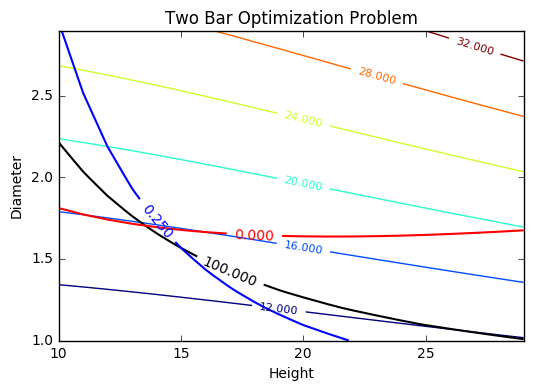

In [111]:
# Create figure
plt.figure
# Plot weight contours
CS = plt.contour(height, diam, w)
plt.clabel(CS, inline=1, fontsize=8)
# Plot Stress < 100
CS = plt.contour(height, diam, s,[100.0], colors='k',linewidths=[1.5])
plt.clabel(CS, inline=1, fontsize=10)
# Plot Deflection < 0.25
CS = plt.contour(height, diam, d,[0.25], colors='b',linewidths=[1.5])
plt.clabel(CS, inline=1, fontsize=10)
# Plot stress - buckling < 0.0
CS = plt.contour(height, diam, s-b,[0.0],colors='r',linewidths=[1.5])
plt.clabel(CS, inline=1, fontsize=10)

# Axis Labels
plt.xlabel('Height')
plt.ylabel('Diameter')
plt.title('Two Bar Optimization Problem')